#Import

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
!pip install scikeras

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 69.3 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer, Reshape, RepeatVector, TimeDistributed, Conv2D, GRU, MaxPooling2D, LSTM, Dense, Dropout, Input, Reshape, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import seaborn as sns

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

Checking Available GPUs

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Num GPUs Available:  0


#Keras Deep Learning

In [6]:
def create_keras_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7146 - loss: 0.5341 - val_accuracy: 0.4077 - val_loss: 0.7424
Epoch 2/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.7351 - loss: 0.4808 - val_accuracy: 0.5249 - val_loss: 0.6973
Epoch 3/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.7371 - loss: 0.4701 - val_accuracy: 0.4959 - val_loss: 0.7301
Epoch 4/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.7398 - loss: 0.4644 - val_accuracy: 0.5674 - val_loss: 0.8376
Epoch 5/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.7410 - loss: 0.4602 - val_accuracy: 0.6948 - val_loss: 0.6330
Epoch 6/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.7405 - loss: 0.4588 - val_accuracy: 0.6538 - val_loss: 0.6333
Epoch 7/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - accuracy: 0.7431 - loss: 0.4570 - val_accuracy: 0.3801 - val_loss: 0.6978
Epoch 8/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 

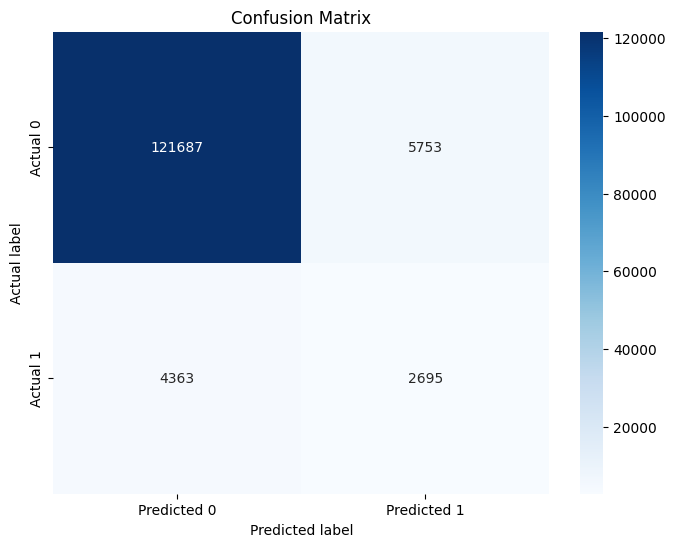

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


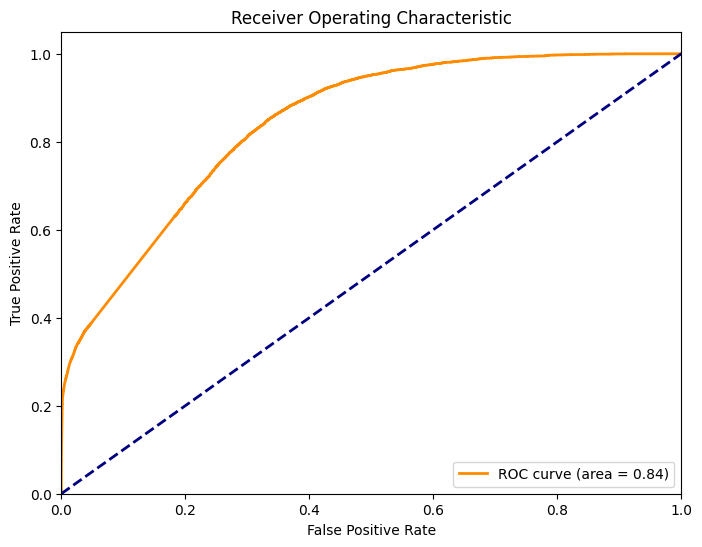

,Metric,Value
0,Accuracy,0.924787
1,Precision,0.319010
2,Recall,0.381836
3,F1-Score,0.347607
4,TPR,0.381836
5,FPR,0.045143
6,TNR,0.954857
7,FNR,0.618164
8,Youden's J,0.336693


In [7]:
X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)


input_shape = (X_train_smote1.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train_smote1, y_train_smote1, epochs=10, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_keras)
precision = precision_score(y_test1, y_pred_keras)
recall = recall_score(y_test1, y_pred_keras)
f1 = f1_score(y_test1, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

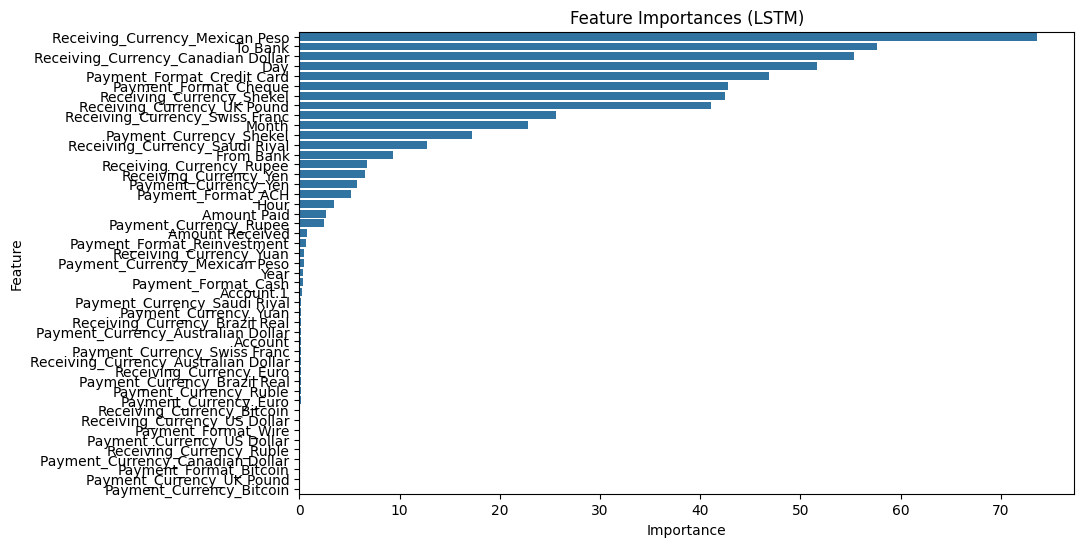

In [8]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.7096 - loss: 0.5422 - val_accuracy: 0.4527 - val_loss: 0.7691
Epoch 2/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.7351 - loss: 0.4791 - val_accuracy: 0.3629 - val_loss: 0.7709
Epoch 3/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.7368 - loss: 0.4677 - val_accuracy: 0.7183 - val_loss: 0.5192
Epoch 4/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.7380 - loss: 0.4646 - val_accuracy: 0.7221 - val_loss: 0.5404
Epoch 5/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.7401 - loss: 0.4601 - val_accuracy: 0.3119 - val_loss: 0.7432
Epoch 6/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.7408 - loss: 0.4592 - val_accuracy: 0.3869 - val_loss: 0.7451
Epoch 7/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.7424 - loss: 0.4569 - val_accuracy: 0.5939 - val_loss: 1.5380
Epoch 8/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - accuracy: 

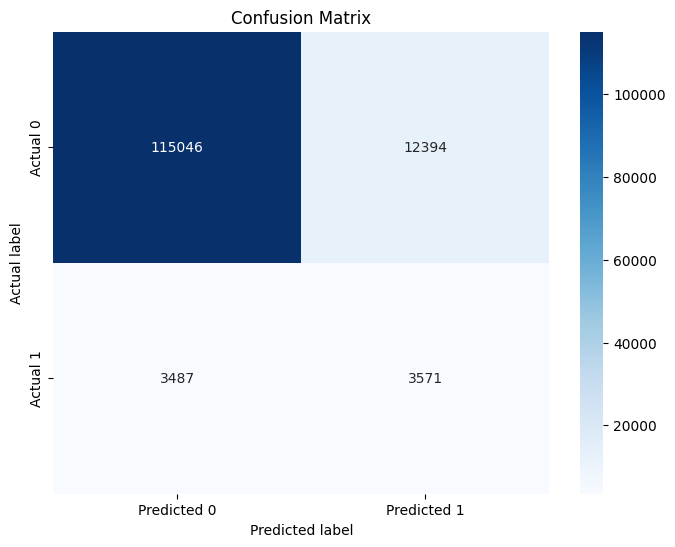

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


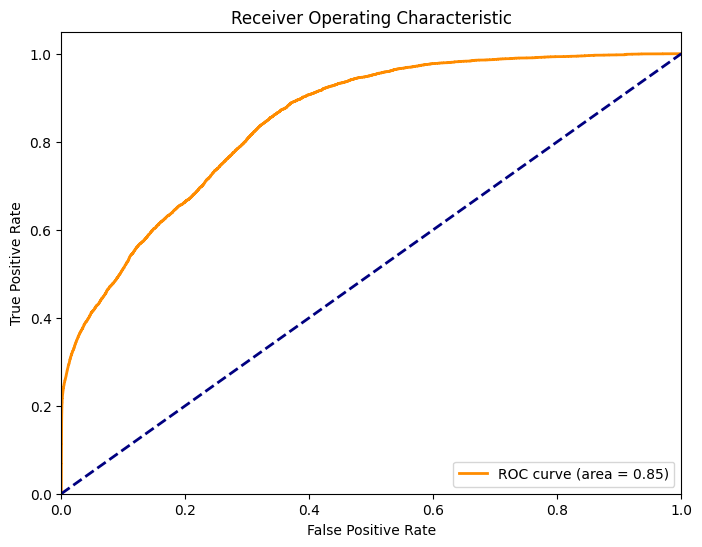

,Metric,Value
0,Accuracy,0.881924
1,Precision,0.223677
2,Recall,0.505951
3,F1-Score,0.310212
4,TPR,0.505951
5,FPR,0.097254
6,TNR,0.902746
7,FNR,0.494049
8,Youden's J,0.408697


In [10]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)
input_shape = (X_train_smote1.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train_smote1, y_train_smote1, epochs=30, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_keras)
precision = precision_score(y_test1, y_pred_keras)
recall = recall_score(y_test1, y_pred_keras)
f1 = f1_score(y_test1, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

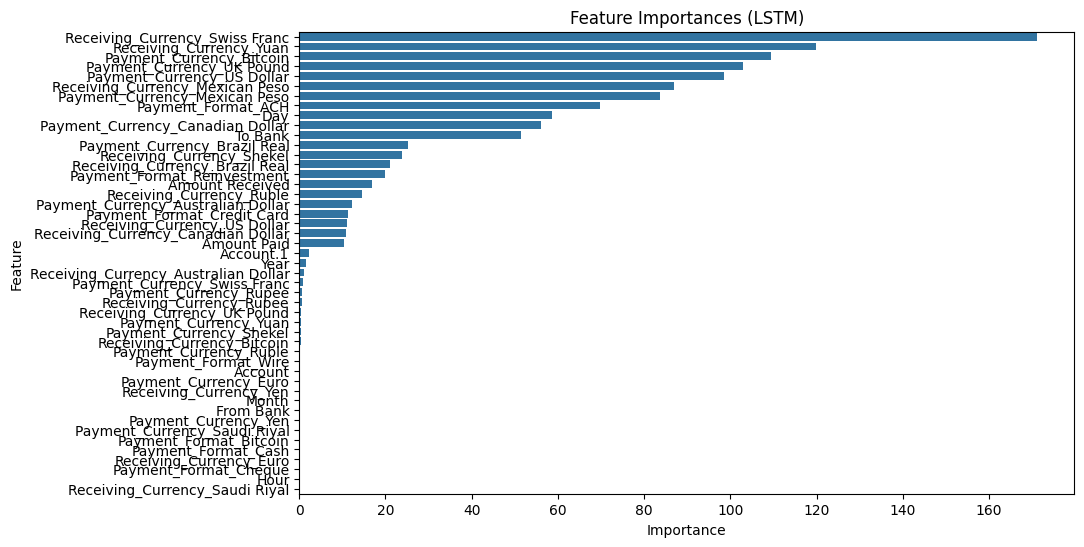

In [11]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Recurrent Neural Networks

In [12]:
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu', return_sequences=False))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 125s 5ms/step - accuracy: 0.6688 - loss: 0.6083 - val_accuracy: 0.0010 - val_loss: 1.2528
Epoch 2/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - accuracy: 0.7108 - loss: 0.5438 - val_accuracy: 0.1743 - val_loss: 0.8867
Epoch 3/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - accuracy: 0.7115 - loss: 0.5375 - val_accuracy: 0.1491 - val_loss: 1.2506
Epoch 4/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 120s 5ms/step - accuracy: 0.7155 - loss: 0.5254 - val_accuracy: 0.1508 - val_loss: 1.1905
Epoch 5/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 128s 5ms/step - accuracy: 0.7185 - loss: 0.5147 - val_accuracy: 0.1616 - val_loss: 0.9930
Epoch 6/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 117s 5ms/step - accuracy: 0.7228 - loss: 0.5111 - val_accuracy: 0.1126 - val_loss: 1.1042
Epoch 7/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - accuracy: 0.7232 - loss: 0.5085 - val_accuracy: 0.1601 - val_loss: 1.3727
Epoch 8/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - ac

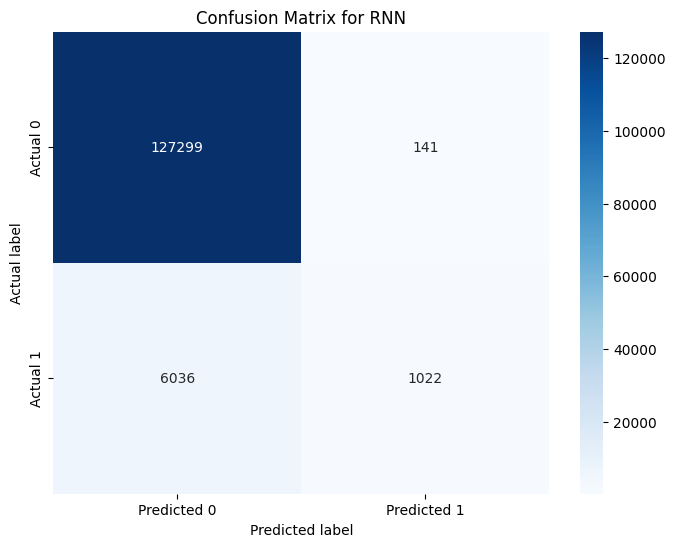

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


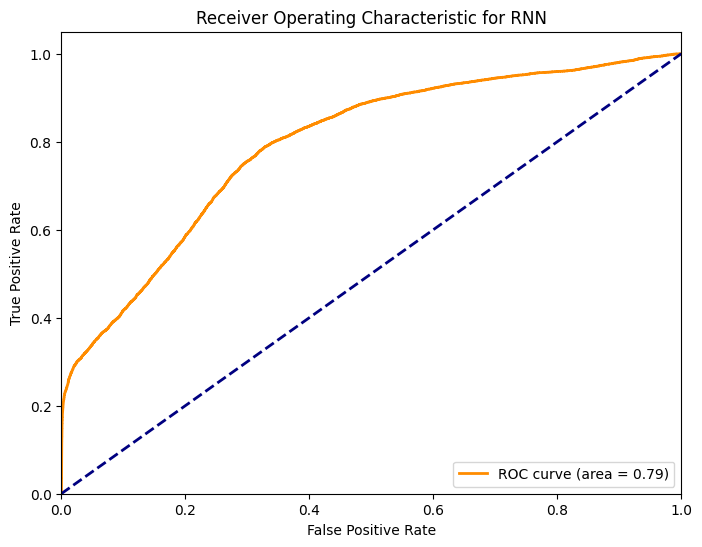

Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.954074
1,Precision,0.878762
2,Recall,0.144800
3,F1-Score,0.248632
4,TPR,0.144800
5,FPR,0.001106
6,TNR,0.998894
7,FNR,0.855200
8,Youden's J,0.143694


In [13]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train_smote1, y_train_smote1, epochs=10, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_rnn)
precision = precision_score(y_test1, y_pred_rnn)
recall = recall_score(y_test1, y_pred_rnn)
f1 = f1_score(y_test1, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

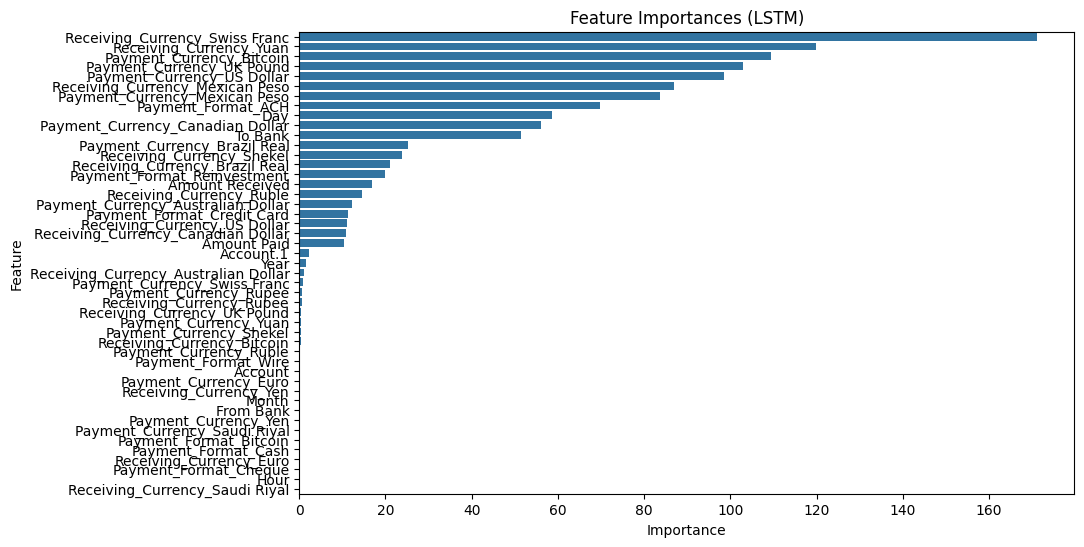

In [14]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 126s 5ms/step - accuracy: 0.6620 - loss: 0.6146 - val_accuracy: 0.0231 - val_loss: 9.6761
Epoch 2/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - accuracy: 0.7076 - loss: 0.5514 - val_accuracy: 0.0017 - val_loss: 0.9506
Epoch 3/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - accuracy: 0.7138 - loss: 0.5248 - val_accuracy: 0.1318 - val_loss: 0.9176
Epoch 4/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 123s 5ms/step - accuracy: 0.7140 - loss: 0.5146 - val_accuracy: 0.1272 - val_loss: 0.9650
Epoch 5/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 117s 5ms/step - accuracy: 0.7118 - loss: 0.5131 - val_accuracy: 0.0456 - val_loss: 0.8764
Epoch 6/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 114s 4ms/step - accuracy: 0.7131 - loss: 0.5151 - val_accuracy: 0.1568 - val_loss: 0.9616
Epoch 7/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 126s 5ms/step - accuracy: 0.7135 - loss: 0.5081 - val_accuracy: 0.5140 - val_loss: 0.7595
Epoch 8/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 115s 5ms/step - ac

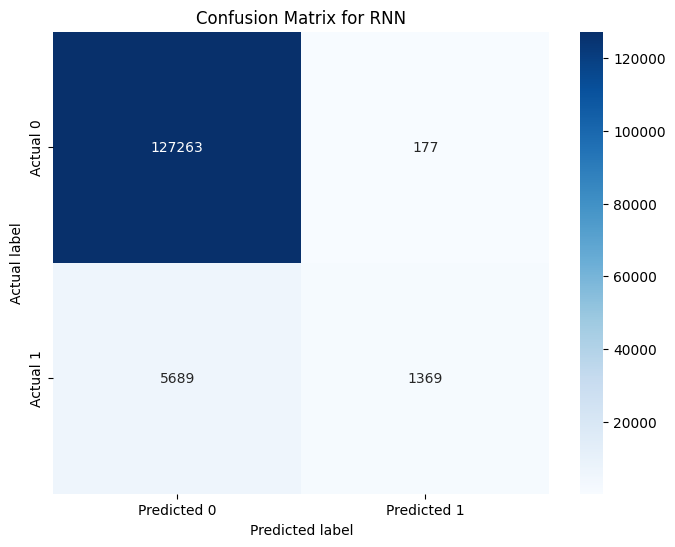

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


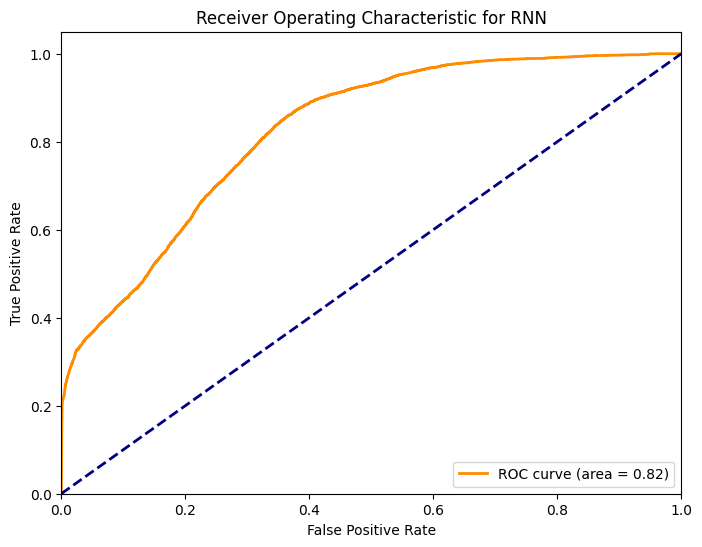

Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.956386
1,Precision,0.885511
2,Recall,0.193964
3,F1-Score,0.318224
4,TPR,0.193964
5,FPR,0.001389
6,TNR,0.998611
7,FNR,0.806036
8,Youden's J,0.192575


In [15]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train_smote1, y_train_smote1, epochs=30, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_rnn)
precision = precision_score(y_test1, y_pred_rnn)
recall = recall_score(y_test1, y_pred_rnn)
f1 = f1_score(y_test1, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

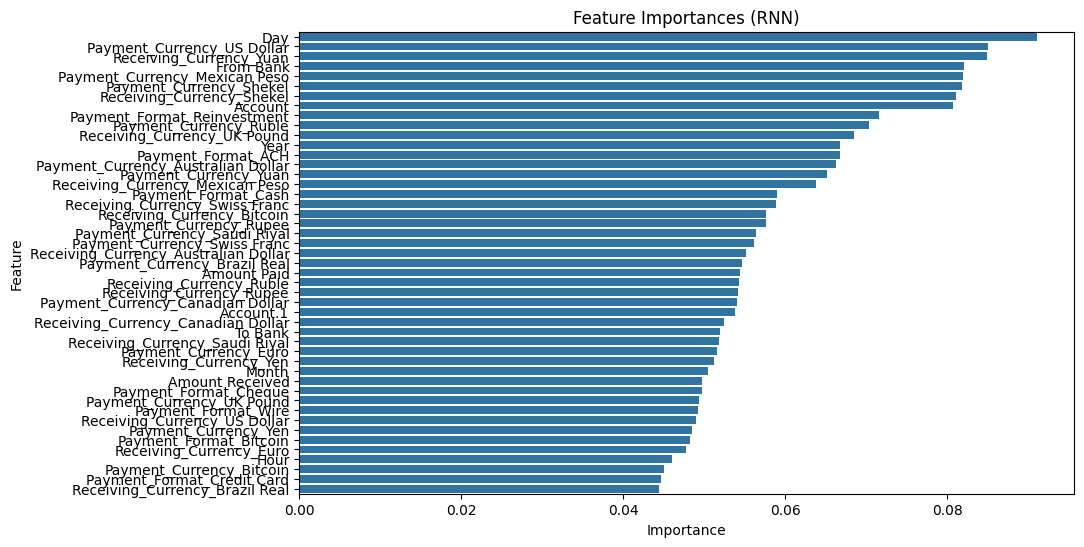

In [16]:
original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (RNN)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Long Short Term Memory

In [17]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 130s 5ms/step - accuracy: 0.6546 - loss: 0.6227 - val_accuracy: 0.0845 - val_loss: 0.9701
Epoch 2/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 124s 5ms/step - accuracy: 0.6872 - loss: 0.5717 - val_accuracy: 0.0161 - val_loss: 26.2046
Epoch 3/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - accuracy: 0.6892 - loss: 0.5719 - val_accuracy: 0.4631 - val_loss: 0.7520
Epoch 4/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 135s 5ms/step - accuracy: 0.6973 - loss: 0.5490 - val_accuracy: 0.2179 - val_loss: 1.4111
Epoch 5/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 135s 5ms/step - accuracy: 0.6990 - loss: 0.5465 - val_accuracy: 0.1499 - val_loss: 1.1061
Epoch 6/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - accuracy: 0.7046 - loss: 0.5420 - val_accuracy: 0.1816 - val_loss: 1.0046
Epoch 7/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 139s 5ms/step - accuracy: 0.7068 - loss: 0.5411 - val_accuracy: 0.1845 - val_loss: 0.8921
Epoch 8/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 127s 5ms/step - a

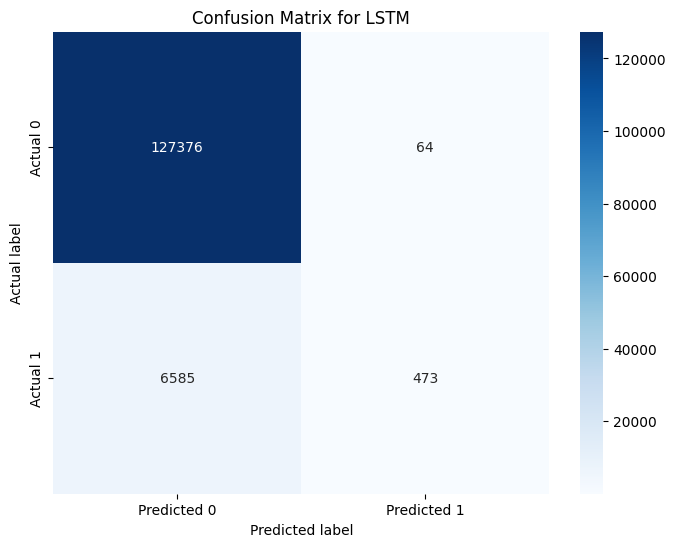

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


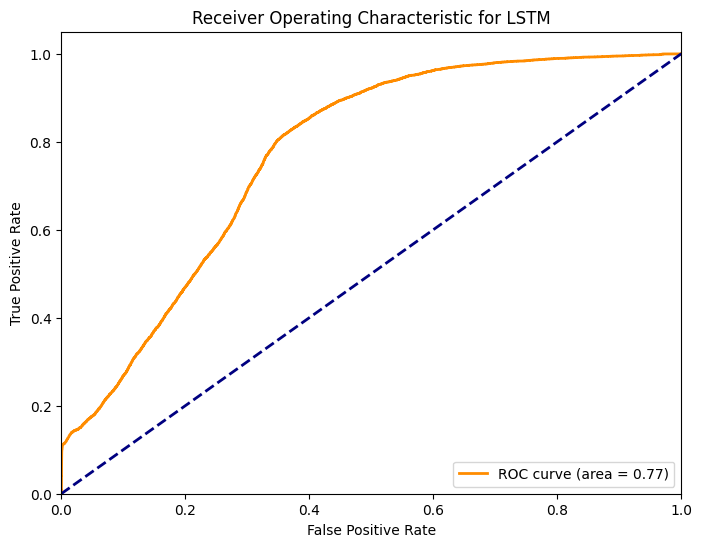

Metrics for LSTM Model:


,Metric,Value
0,Accuracy,0.950564
1,Precision,0.880819
2,Recall,0.067016
3,F1-Score,0.124556
4,TPR,0.067016
5,FPR,0.000502
6,TNR,0.999498
7,FNR,0.932984
8,Youden's J,0.066514


In [18]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train_smote1, y_train_smote1, epochs=10, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_lstm)
precision = precision_score(y_test1, y_pred_lstm)
recall = recall_score(y_test1, y_pred_lstm)
f1 = f1_score(y_test1, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

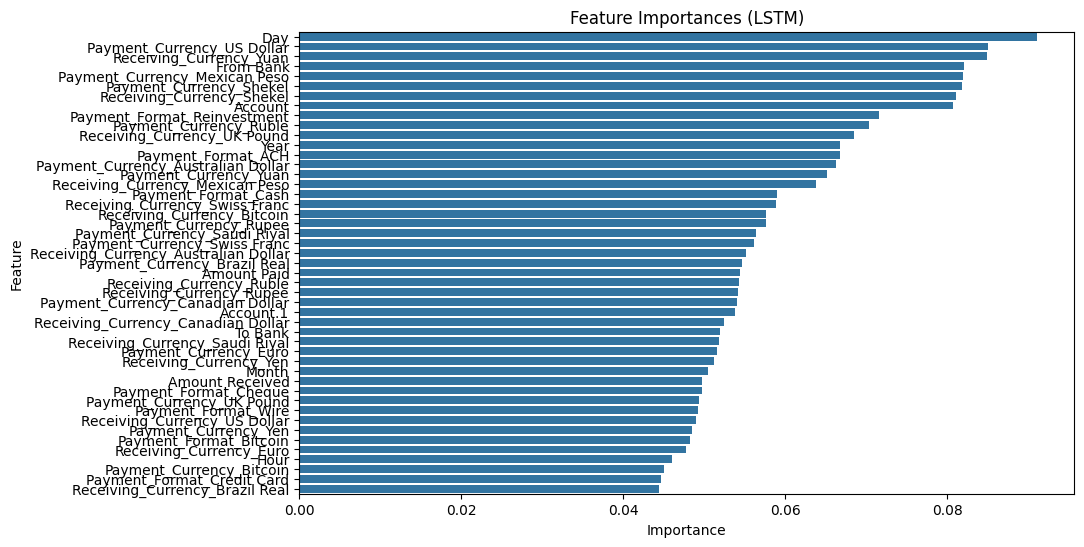

In [19]:
original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 121s 5ms/step - accuracy: 0.6652 - loss: 0.6105 - val_accuracy: 0.1681 - val_loss: 0.9053
Epoch 2/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 123s 5ms/step - accuracy: 0.6956 - loss: 0.5622 - val_accuracy: 1.1278e-04 - val_loss: 0.9562
Epoch 3/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 137s 5ms/step - accuracy: 0.6969 - loss: 0.5550 - val_accuracy: 0.1567 - val_loss: 0.9530
Epoch 4/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - accuracy: 0.7032 - loss: 0.5476 - val_accuracy: 0.1185 - val_loss: 0.9810
Epoch 5/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 127s 5ms/step - accuracy: 0.7016 - loss: 0.5374 - val_accuracy: 0.0000e+00 - val_loss: 1.0701
Epoch 6/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 129s 5ms/step - accuracy: 0.7104 - loss: 0.5311 - val_accuracy: 0.1594 - val_loss: 1.1778
Epoch 7/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 130s 5ms/step - accuracy: 0.7139 - loss: 0.5232 - val_accuracy: 0.1539 - val_loss: 1.0629
Epoch 8/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 127s 5ms/s

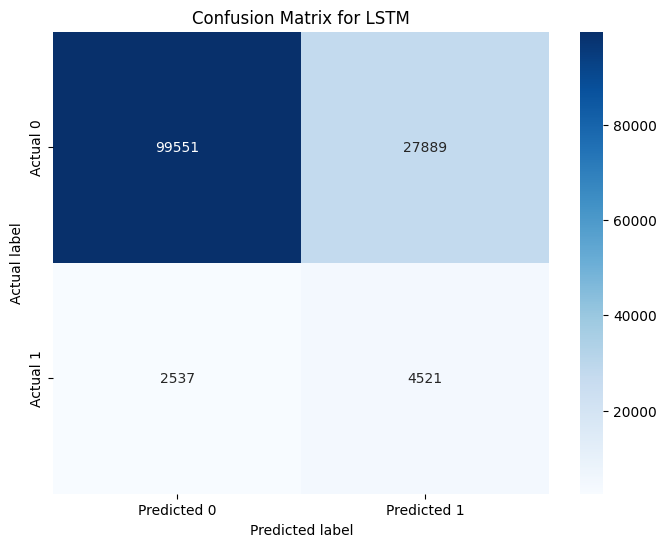

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


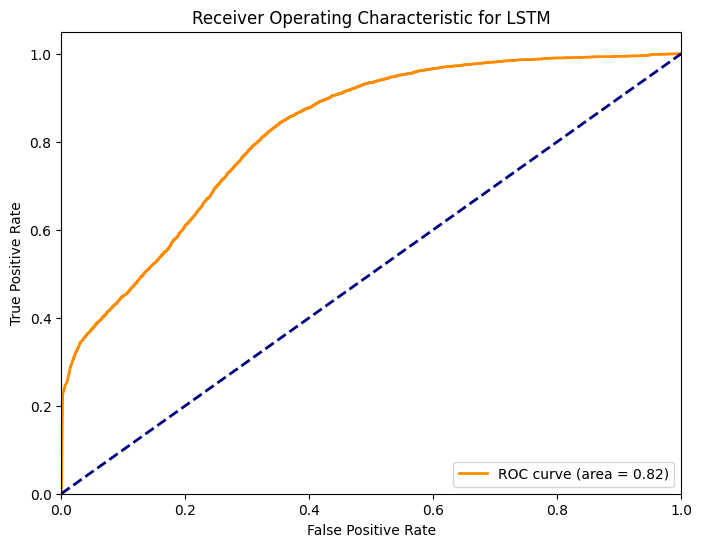

Metrics for LSTM Model:


,Metric,Value
0,Accuracy,0.773781
1,Precision,0.139494
2,Recall,0.640550
3,F1-Score,0.229097
4,TPR,0.640550
5,FPR,0.218840
6,TNR,0.781160
7,FNR,0.359450
8,Youden's J,0.421709


In [20]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train_smote1, y_train_smote1, epochs=30, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_lstm)
precision = precision_score(y_test1, y_pred_lstm)
recall = recall_score(y_test1, y_pred_lstm)
f1 = f1_score(y_test1, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

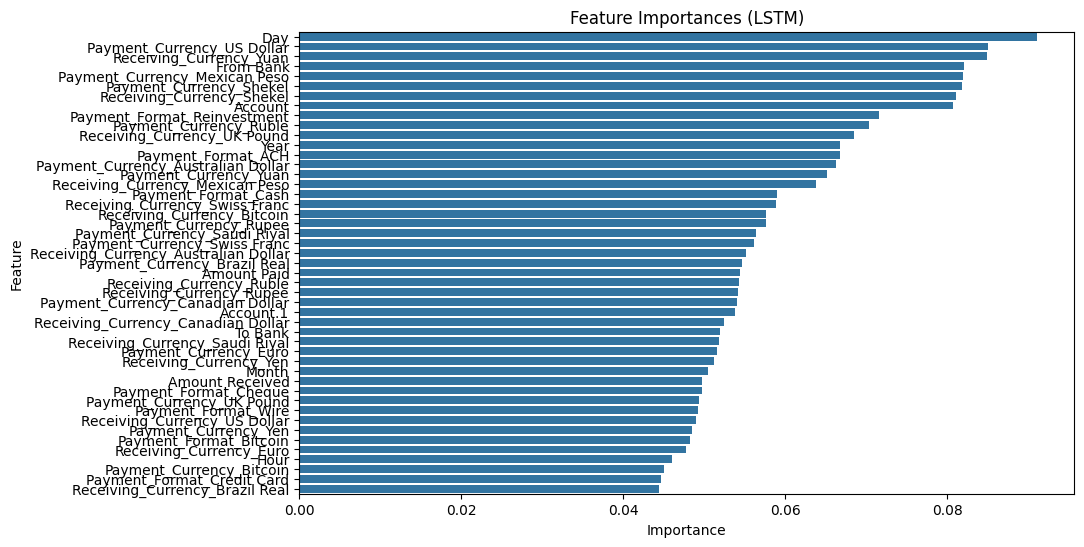

In [21]:

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()